In [1]:
import os

import dill
import joypy
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

RESULTS_DIR = 'results'

# environments = ['MAZE4', 'MAZE7', 'MAZEF2', 'MAZET3']
algs = {
    '-1': 'ACS2',
    '3-EER': 'ACS2-EER',
    '3-ER': 'ACS2-ER',
    'SQ': 'Q-Learning',
    'DQN': 'DQN'
}

# Bayes Analysis
- [visualization gallery](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

ER - Experience Replay
EER - Episode Experience Replay - replay whole episode without assigning priorities (each one has same probability)

In [2]:
def load_data(environment, metric):
    data_path = os.path.join(RESULTS_DIR, environment, metric)
    models = {}
    for f in os.listdir(data_path):
        model_id = f.split('.')[0]
        model = dill.load(open(os.path.join(data_path, f), 'rb'))
        models[model_id] = model
    return models

In [3]:
# m = load_data('MAZET2', 'knowledge95')
# for alg in algs:
#     print(f'{alg}: {np.mean(m[alg].mu):.2f} +/ {np.std(m[alg].mu):.2f}')

In [4]:
def to_df(arr):
    df = pd.DataFrame(arr)
    df.set_index('env', inplace=True)
    df = df.apply(pd.Series.explode).reset_index()
    df = df.astype({
        'ACS2': float,
        'ACS2 ER': float,
        'ACS2 EER': float
    })
    return df

## Steps

In [5]:
steps_arr = []

for env in os.listdir(RESULTS_DIR):
    env_metrics = load_data(env, 'steps')
    steps_arr.append({
        'env': env,
        'ACS2': env_metrics['-1'].mu,
        'ACS2 ER': env_metrics['3-ER'].mu,
        'ACS2 EER': env_metrics['3-EER'].mu,
        'Q-Learning': env_metrics['SQ'].mu,
        'DQN': env_metrics['DQN'].mu,
    })

In [6]:
steps_df = to_df(steps_arr)
steps_df = steps_df.astype({
    'Q-Learning': float,
    'DQN': float
})
steps_df.head()

,env,ACS2,ACS2 ER,ACS2 EER,Q-Learning,DQN
0,MAZE5,12.538462,11.038043,10.708995,17.004296,14.716351
1,MAZE5,12.444964,10.974886,10.726264,17.528871,14.368299
2,MAZE5,12.541391,11.090451,10.729508,16.638034,14.574972
3,MAZE5,12.501942,11.007670,10.740027,18.007499,14.526949
4,MAZE5,12.461075,11.016494,10.751737,17.342484,14.124032


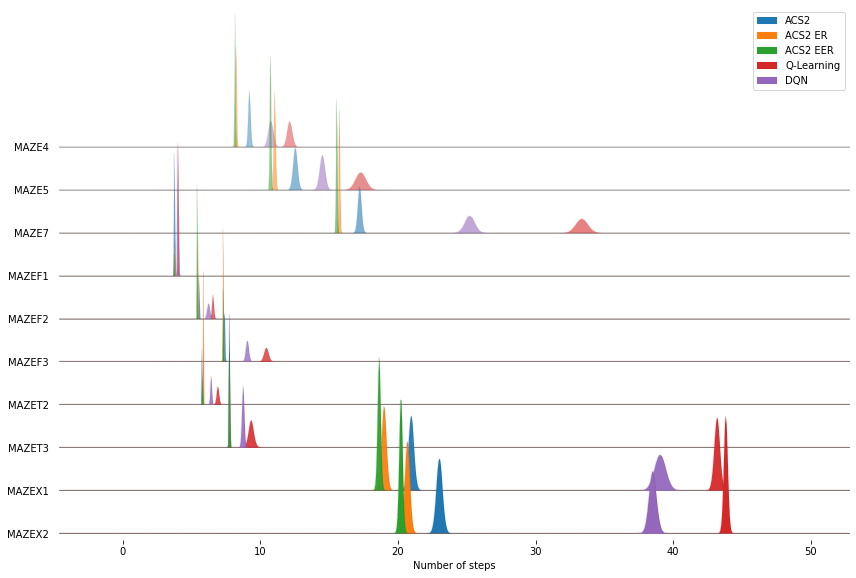

In [7]:
steps_fig, ax = joypy.joyplot(steps_df,
                        by='env',
                        # column=['ACS2', 'ACS2 ER'],
                        column=['ACS2', 'ACS2 ER', 'ACS2 EER', 'Q-Learning', 'DQN'],
                        overlap=3,
                        linewidth=0.05,
                        fade=True,
                        ylim='own',
                        # title=f'Bayesian distribution of executed steps',
                        legend=True,
                        figsize=(12, 8),
                        grid='y')

plt.xlabel('Number of steps')
plt.show()

steps_fig.savefig('bayes_steps.png', dpi=300)

## Knowledge

In [8]:
knowledge_arr = []

for env in os.listdir(RESULTS_DIR):
    env_metrics = load_data(env, 'knowledge95')
    knowledge_arr.append({
        'env': env,
        'ACS2': env_metrics['-1'].mu,
        'ACS2 ER': env_metrics['3-ER'].mu,
        'ACS2 EER': env_metrics['3-EER'].mu
    })

In [9]:
knowledge_df = to_df(knowledge_arr)
knowledge_df.head()

,env,ACS2,ACS2 ER,ACS2 EER
0,MAZE5,3519.738634,629.636009,363.106607
1,MAZE5,3533.848225,650.819666,364.383251
2,MAZE5,3088.475936,602.710898,373.507300
3,MAZE5,3222.042893,623.340970,375.155139
4,MAZE5,3230.199884,614.827198,381.147810


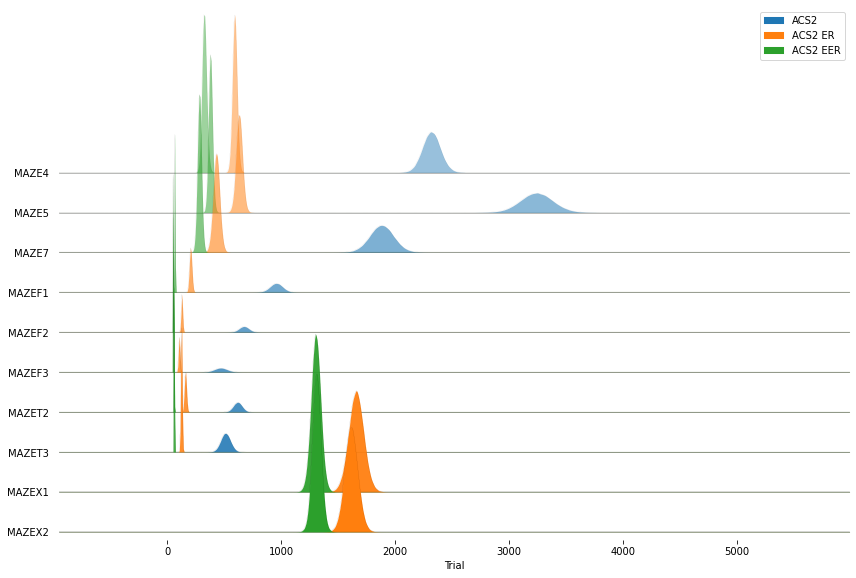

In [10]:
knowledge_fig, ax = joypy.joyplot(knowledge_df,
                                  by='env',
                                  column=['ACS2', 'ACS2 ER', 'ACS2 EER'],
                                  overlap=3,
                                  linewidth=0.05,
                                  fade=True,
                                  ylim='own',
                                  # title=f'Bayesian distribution of obtained knowledge',
                                  legend=True,
                                  figsize=(12, 8),
                                  grid='y')

plt.xlabel('Trial')
plt.show()

knowledge_fig.savefig('bayes_knowledge95.png', dpi=300)